[ 0.57735027  0.57735027  0.57735027]	0.796077821492
[ 0.84515425  0.50709255 -0.16903085]	0.385824197528
[ 0.97629563  0.21223818  0.04244764]	0.113965231702
[ 0.99357922  0.11267393 -0.01024308]	0.0616575900774
[ 0.9986147   0.05255867  0.00250279]	0.0261827754444
[  9.99646417e-01   2.65830525e-02  -6.18210524e-04]	0.0135539871968
[  9.99914785e-01   1.30537178e-02   1.53573151e-04]	0.00651254434133
[  9.99978585e-01   6.54431237e-03  -3.82708326e-05]	0.00328738801257
[  9.99994695e-01   3.25731171e-03   9.55223375e-06]	0.00162763708812
[  9.99998672e-01   1.62972326e-03  -2.38612484e-06]	0.000815795034484
[  9.99999669e-01   8.13934290e-04   5.96288857e-07]	0.000406901554781
[  9.99999917e-01   4.07033494e-04  -1.49041924e-07]	0.000203574793059
[  9.99999979e-01   2.03458795e-04   3.72566921e-08]	0.000101725268429
[  9.99999995e-01   1.01733539e-04  -9.31369942e-09]	5.08703927284e-05
[  9.99999999e-01   5.08631475e-05   2.32836565e-09]	2.54313152293e-05
[  1.00000000e+00   2.543183

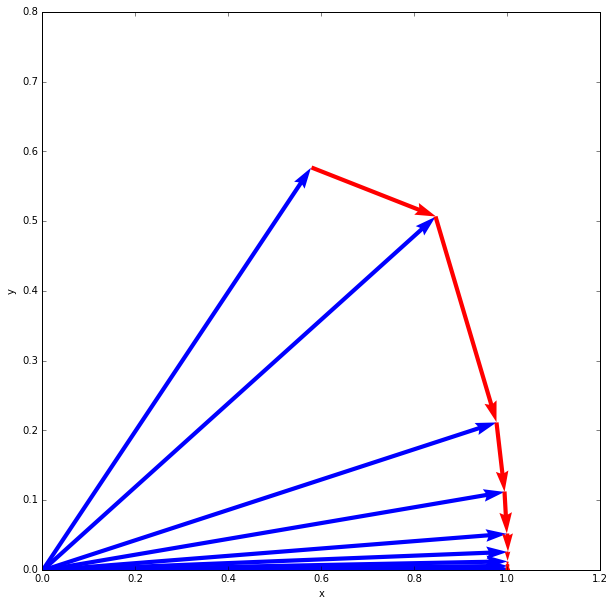

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def norma_L2(x):                          #pomocnicza funkcyjka
    kwadraty = x**2
    suma_kwadratow = np.sum(kwadraty)
    return np.sqrt(suma_kwadratow)


a = np.array([[4,1,0],
             [0,2,1],
             [0,0,-1]], dtype=float)
x = np.array([1.,1.,1.])
x = x/norma_L2(x) #normalizuję do 1
dokladnosc = 0.00000001

#zaczynam iterować



fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_xlim(0,1.2)
axes.set_ylim(0,0.8)
axes.quiver(0,0,x[0], x[1], scale_units='xy', scale=1, angles='xy', color='blue')
x_next = a@x / norma_L2(a@x)           #pierdyknij macierzą i znormalizuj do 1
difference = x_next - x

while(norma_L2(difference) > dokladnosc):    #dopóki długość wektora różnicy naszych dwóch
                                             #jest większa niż dokładność
                                             #to jest ten czerwony wektor
        
    print(x, norma_L2(x_next-x), sep='\t')   #jak wygląda nasz bieżący wektor?
    
    axes.quiver(x[0],x[1], difference[0], difference[1],scale_units='xy', scale=1, angles='xy', color='red')
    axes.quiver(0,0,x_next[0], x_next[1], scale_units='xy', scale=1, angles='xy', color='blue')

    x = x_next                               #wyrzucamy stary, przechodzimy do kolejnej 
    
    
    x_next = a@x / norma_L2(a@x)       #pierdyknij macierzą i znormalizuj do 1
    difference = x_next - x
    
# Ax = lambda x
# skoro ||x|| = 1 to ||Ax|| = ||lambda x|| = ||lambda|| ||x|| = ||lambda||
# więc teraz jak długość x = 1 to długość Ax = lambda
print(norma_L2(a@x))

In [32]:
#dla porównania z analitycznym
eigvals, eigvecs = np.linalg.eig(a)
for val, vec in zip(eigvals, eigvecs.T):      #z jakiegoś powodu eig zwraca wektory w kolumnach
    print(val, vec, sep = '\t')

#jak spojrzysz na ten pierwszy to zgadza się z tym co dostaliśmy

4.0	[ 1.  0.  0.]
2.0	[-0.4472136   0.89442719  0.        ]
-1.0	[ 0.06311944 -0.3155972   0.9467916 ]


In [61]:
axes.quiver?